In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_c(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="c",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/c_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (C, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (C, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_c(save_directory="./", split="train")

Resolving data files:   0%|          | 0/53 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/110 [00:00<?, ?it/s]

Saving the dataset (0/110 shards):   0%|          | 0/8536791 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (C, train) successfully downloaded and saved to './/c_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./c_train_dataset")

Loading dataset from disk:   0%|          | 0/110 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 8536791
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'third_party/apr-1/64/apu_want.h', 'max_stars_repo_name': 'adamvent/googlesitemapgenerator', 'max_stars_count': 1.0, 'id': '0', 'content': '<reponame>adamvent/googlesitemapgenerator<filename>third_party/apr-1/64/apu_want.h\n/* Copyright 2000-2005 The Apache Software Foundation or its licensors, as\n * applicable.\n *\n * Licensed under the Apache License, Version 2.0 (the "License");\n * you may not use this file except in compliance with the License.\n * You may obtain a copy of the License at\n *\n *     http://www.apache.org/licenses/LICENSE-2.0\n *\n * Unless required by applicable law or agreed to in writing, software\n * distributed under the License is distributed on an "AS IS" BASIS,\n * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n * See the License for the specific language governing permissions and\n * limitations under the License.\n */\n\n#include "apu.h"        /* configuration data */\n\n/**\n * @file apu_want.h\n * @b

In [7]:
dataset = dataset.sort(
    column_names=['max_stars_count', 'max_stars_repo_name'],
    reverse=[True, False]
)

In [8]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/8536791 [00:00<?, ? examples/s]

Example 0:
/* Copyright 2016 The TensorFlow Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
==============================================================================*/

#ifndef TENSORFLOW_CORE_KERNELS_IMAGEEXTRACT_IMAGE_PATCHES_OP_H_
#define TENSORFLOW_CORE_KERNELS_IMAGEEXTRACT_IMAGE_PATCHES_OP_H_

#include "third_party/eigen3/unsupported/Eigen/CXX11/Tensor"
#include "tensorflow/core/framework/tensor_shape.h"
#include "tensorflow/core/framework/tensor_types.h"

namespace tensorflow {

In [9]:
sliced_dataset = dataset[:2500000]

In [10]:
del dataset

In [11]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [12]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     2.793376e+01
std      1.005825e+01
min      2.857143e-01
25%      2.128467e+01
50%      2.674468e+01
75%      3.286885e+01
max      1.285000e+02
Name: avg_line_length, dtype: float64


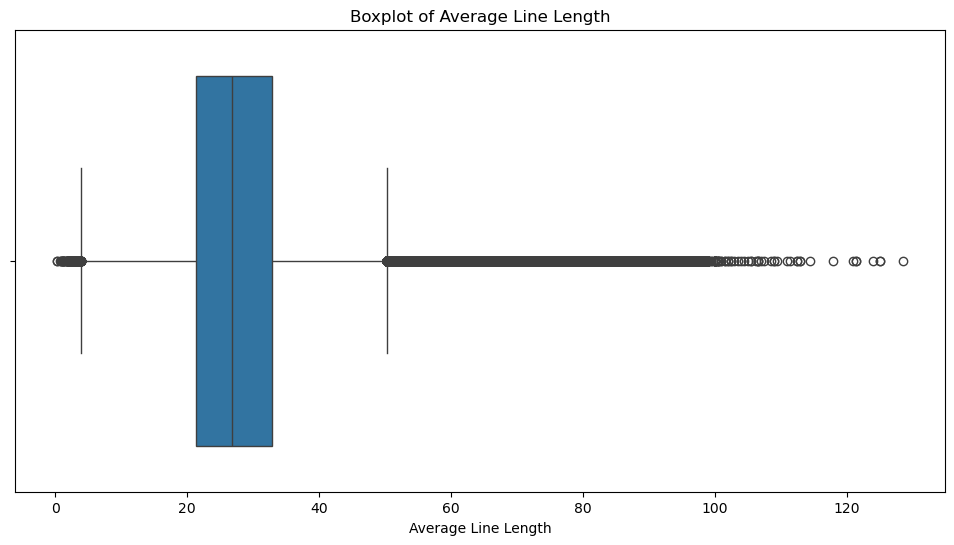

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [14]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [15]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 69563


In [16]:
outliers['avg_line_length'].describe()

count    69563.000000
mean        61.843028
std         11.877347
min          0.285714
25%         53.257291
50%         58.108911
75%         67.557916
max        128.500000
Name: avg_line_length, dtype: float64

In [17]:
df.drop(outliers.index, inplace=True)

In [18]:
df['avg_line_length'].describe()

count    2.430437e+06
mean     2.696322e+01
std      8.134746e+00
min      3.909091e+00
25%      2.111111e+01
50%      2.645411e+01
75%      3.224167e+01
max      5.024460e+01
Name: avg_line_length, dtype: float64

In [19]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

33.77142857142857

In [20]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.430437e+06
mean     2.013972e+02
std      6.845414e+02
min      1.000000e+00
25%      3.000000e+01
50%      6.500000e+01
75%      1.570000e+02
max      1.286090e+05
Name: line_count, dtype: float64

In [21]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [22]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1543146
Number of examples with line count in range 101-200: 401485
Number of examples with line count in range 201-300: 161575
Number of examples with line count in range 301-400: 86092
Number of examples with line count in range 401-500: 52847
Number of examples with line count in range 501-600: 35136
Number of examples with line count in range 601-700: 25086
Number of examples with line count in range 701-800: 18659
Number of examples with line count in range 801-900: 14157
Number of examples with line count in range 901-1000: 11002
Number of examples with line count in range 1000+: 81252


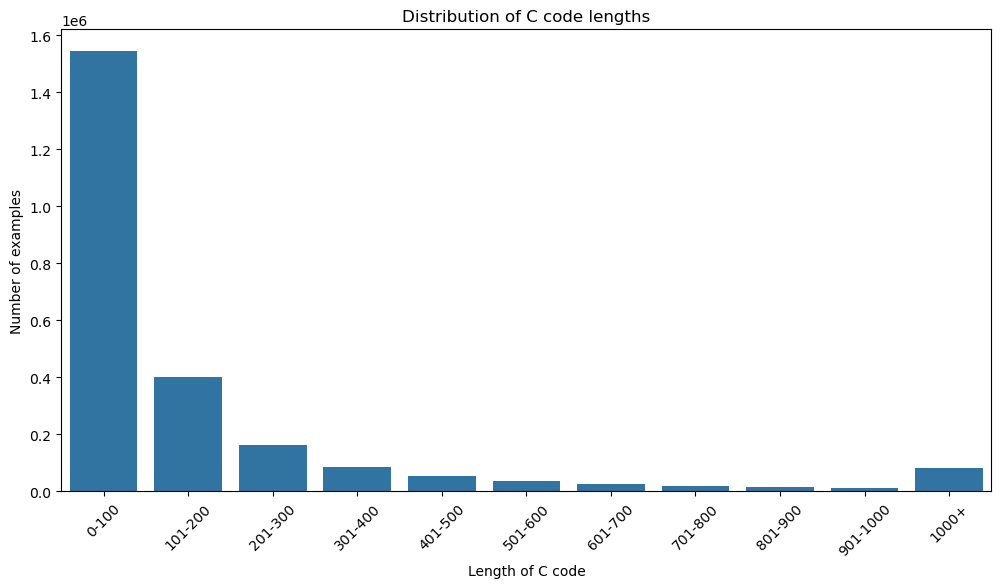

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of C code lengths")
plt.xlabel("Length of C code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [24]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1543146,1543146,63.492532,63.492532
1,101-200,401485,1944631,16.519046,80.011578
2,201-300,161575,2106206,6.647981,86.659560
3,301-400,86092,2192298,3.542244,90.201803
4,401-500,52847,2245145,2.174383,92.376186
5,501-600,35136,2280281,1.445666,93.821852
6,601-700,25086,2305367,1.032160,94.854012
7,701-800,18659,2324026,0.767722,95.621734
8,801-900,14157,2338183,0.582488,96.204222
9,901-1000,11002,2349185,0.452676,96.656898


In [25]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [26]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,/* Copyright 2016 The TensorFlow Authors. All ...,39.000000,52
1,<filename>tensorflow/core/common_runtime/plugg...,39.109091,55
2,/* Copyright 2021 The TensorFlow Authors. All ...,38.353333,150
3,/* Copyright 2021 The TensorFlow Authors. All ...,33.870370,54
4,<filename>tensorflow/core/util/autotune_maps/a...,35.380000,50


In [27]:
df_filtered.shape

(2430437, 3)

In [28]:
df_filtered = df_filtered[df_filtered['line_count'] <= 400]
df_filtered.shape

(2192298, 3)

In [29]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 33]
df_filtered.shape

(1712928, 3)

In [30]:
df_filtered.head()

,content,avg_line_length,line_count
10,/* Copyright 2019 The TensorFlow Authors. All ...,32.014634,205
12,<reponame>EricRemmerswaal/tensorflow\n/* Copyr...,32.046875,256
15,/* Copyright 2021 The TensorFlow Authors. All ...,31.666667,39
16,<reponame>EricRemmerswaal/tensorflow\n/* Copyr...,32.378378,37
20,/* Copyright 2018 The TensorFlow Authors. All ...,31.967213,61


In [31]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.430437e+06  2.430437e+06
mean      2.696322e+01  2.013972e+02
std       8.134746e+00  6.845414e+02
min       3.909091e+00  1.000000e+00
25%       2.111111e+01  3.000000e+01
50%       2.645411e+01  6.500000e+01
75%       3.224167e+01  1.570000e+02
max       5.024460e+01  1.286090e+05

       avg_line_length    line_count
count     1.712928e+06  1.712928e+06
mean      2.345218e+01  8.137967e+01
std       5.673452e+00  8.254071e+01
min       3.909091e+00  1.000000e+00
25%       1.937313e+01  2.400000e+01
50%       2.389583e+01  5.000000e+01
75%       2.801389e+01  1.070000e+02
max       3.300000e+01  4.000000e+02


In [32]:
data_dict_c = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_c[f"c_{i}"] = example

In [33]:
assert len(data_dict_c) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [34]:
for i, (k,v) in enumerate(data_dict_c.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example c_0:
/* Copyright 2019 The TensorFlow Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
==============================================================================*/

#ifndef TENSORFLOW_LITE_DELEGATES_GPU_GL_GL_TEXTURE_H_
#define TENSORFLOW_LITE_DELEGATES_GPU_GL_GL_TEXTURE_H_

#include "absl/types/span.h"
#include "tensorflow/lite/delegates/gpu/common/data_type.h"
#include "tensorflow/lite/delegates/gpu/common/status.h"
#include "tensorflow/lite/delegates/gpu/common/tensor.h"
#in

In [35]:
import json

with open('c_train.json', 'w') as f:
    json.dump(data_dict_c, f)
    print("Saved to 'c_train.json'")

Saved to 'c_train.json'
